In [95]:
# #Q1.Create a dataset profile table that gives an overview of the dataset. 


# Essential Libraries
import pandas as pd
import numpy as np

# Visualization for quick insights
import matplotlib.pyplot as plt
import seaborn as sns

# Data Profiling Tool
from pandas_profiling import ProfileReport


!pip install ydata-profiling
!pip install --upgrade Pillow
!pip install --upgrade wordcloud

import pandas as pd
from ydata_profiling import ProfileReport
import os

file_path = r"C:\Users\acer\Downloads\Databreachwashingtondataset.csv"
df = pd.read_csv(file_path)


df.head(20)

categorical_col = df.select_dtypes(include=['object']).columns

# Get basic information about the dataset
print("Total number of Instances (Rows):", df.shape[0])
print("Total number of Features (Columns):", df.shape[1])

# Summary of the dataset
df.info()


# Classify columns as Numeric, Discrete, Temporal, or Categorical
numeric_col = df.select_dtypes(include=[np.number]).columns.tolist()
temporal_col = [col for col in df.columns if 'Date' in col]  # Assuming date columns contain 'Date'
categorical_col = [col for col in df.columns if col not in numeric_col + temporal_col]

print("Numeric Columns:", numeric_col)
print("Temporal Columns:", temporal_col)
print("Categorical/Discrete Columns:", categorical_col)


# Descriptive statistics for numeric columns
numeric_stat = df[numeric_col].describe().T
numeric_stat['median'] = df[numeric_col].median()
numeric_stat['std_dev'] = df[numeric_col].std()

numeric_stat = numeric_stat[['min', 'max', 'mean', 'median', 'std_dev']]
numeric_stat


# Unique values and top 3 most frequent values for categorical columns
discrete_stats = pd.DataFrame(columns=['Column', 'Unique Values', 'Top 3 Values'])

for col in categorical_col:
    unique_vals = df[col].nunique()
    top_vals = df[col].value_counts().head(3).to_dict()
    discrete_stats = discrete_stats.append({
        'Column': col,
        'Unique Values': unique_vals,
        'Top 3 Values': top_vals
    }, ignore_index=True)

discrete_stats


# Missing Value percentage
missing_val = df.isnull().mean() * 100
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)

# Display 
missing_val


#Dataset Profiling
from ydata_profiling.config import Settings
config = Settings()
config.plot.font_path = "C:/Windows/Fonts/ariblk.ttf" 


#Dataset Profiling
profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()
profile_output = "DataBreachProfile.html"
profile.to_file(profile_output)

numeric_stats = df.describe().T[['min', 'max', 'mean', '50%', 'std']]  # Compute Statistics for Numeric Columns ( for median calculation we use 50%, as it is the mid-value)
numeric_stats.rename(columns={'50%': 'median'}, inplace=True)
print("\n Numeric Column Summary:")
print(numeric_stats)

#Generating Profile Report
import os
if os.path.exists(profile_output):
    from IPython.display import FileLink
    print("Click the below link for the profile report:")
    display(FileLink(profile_output))
else:
    print("Profile report was not generated correctly!")

Total number of Instances (Rows): 5251
Total number of Features (Columns): 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           5251 non-null   int64  
 1   DateAware                    5170 non-null   object 
 2   DateSubmitted                5251 non-null   object 
 3   DataBreachCause              5251 non-null   object 
 4   DateStart                    4637 non-null   object 
 5   DateEnd                      4342 non-null   object 
 6   Name                         5251 non-null   object 
 7   CyberattackType              3867 non-null   object 
 8   WashingtoniansAffected       5169 non-null   float64
 9   IndustryType                 5251 non-null   object 
 10  BusinessType                 2236 non-null   object 
 11  InformationType              5251 non-null   object 
 12

C:\Users\acer\AppData\Local\Temp\ipykernel_15232\3788788414.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_15232\3788788414.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_15232\3788788414.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_15232\3788788414.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_15232\3788788414.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


 Numeric Column Summary:
                           min        max          mean   median  \
Id                      9561.0    18350.0  12959.268139  13147.0   
WashingtoniansAffected    15.0  3100608.0  31765.815825   1967.0   
Year                    2016.0     2025.0   2021.776995   2022.0   

                                  std  
Id                        2756.728129  
WashingtoniansAffected  165746.414946  
Year                         2.208376  
Click the below link for the profile report:


C:\Users\acer\DataBreachProfile.html

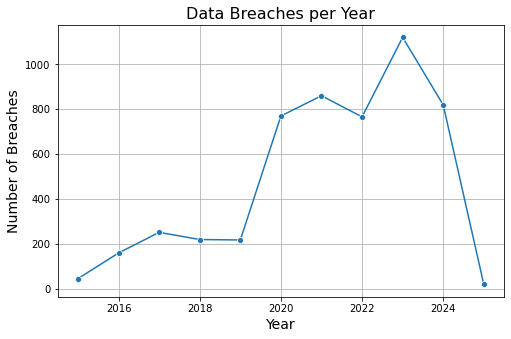

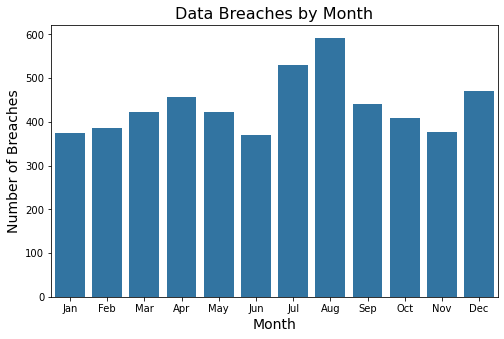

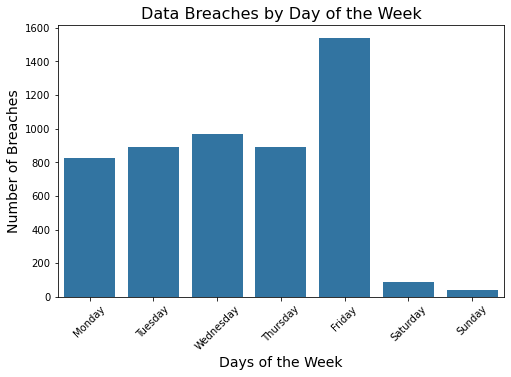

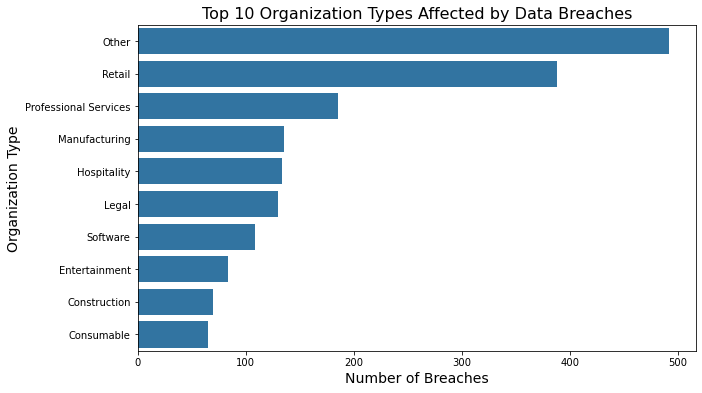

In [96]:
# Question 2: Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and 
# day-of-week) or other aggregate patterns. 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed within the notebook
%matplotlib inline


# Converting the 'DateSubmitted' attribute to a proper datetime format 
df['DateSubmitted'] = pd.to_datetime(df['DateSubmitted'], errors='coerce')

# Extracting Year, Month, and Day for analysis
df['Year'] = df['DateSubmitted'].dt.year
df['Month'] = df['DateSubmitted'].dt.month
df['DayOfWeek'] = df['DateSubmitted'].dt.day_name()


 # plot color
plot_color = "#1f77b4"  # Strong Blue

#Year to year trend analysis
plt.figure(figsize=(8, 5))
yearly_data = df['Year'].value_counts().sort_index()

sns.lineplot(x=yearly_data.index, y=yearly_data.values, marker='o')
plt.title('Data Breaches per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Breaches', fontsize=14)
plt.grid(True)
plt.show()


#Monthly analysis
plt.figure(figsize=(8, 5))
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.countplot(x=df['Month'],  color=plt_color)
plt.xticks(ticks=range(12), labels=month_order)
plt.title('Data Breaches by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Breaches', fontsize=14)
plt.show()



#Day to day analysis
plt.figure(figsize=(8, 5))
dayofweek_data = df['DayOfWeek'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 
                                                 'Thursday', 'Friday', 'Saturday', 'Sunday']]

sns.barplot(x=dayofweek_data.index, y=dayofweek_data.values, color=plt_color)
plt.title('Data Breaches by Day of the Week', fontsize=16)
plt.xlabel('Days of the Week', fontsize=14)
plt.ylabel('Number of Breaches', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Breaches by Organization Type (if applicable)
plt.figure(figsize=(10, 6))
org_type_data = df['BusinessType'].value_counts().head(10)  # Top 10 organization types

sns.barplot(y=org_type_data.index, x=org_type_data.values, color=plt_color)
plt.title('Top 10 Organization Types Affected by Data Breaches', fontsize=16)
plt.xlabel('Number of Breaches', fontsize=14)
plt.ylabel('Organization Type', fontsize=14)
plt.show()


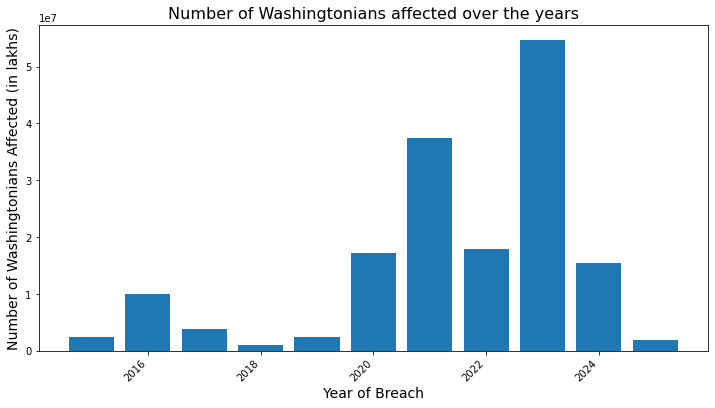

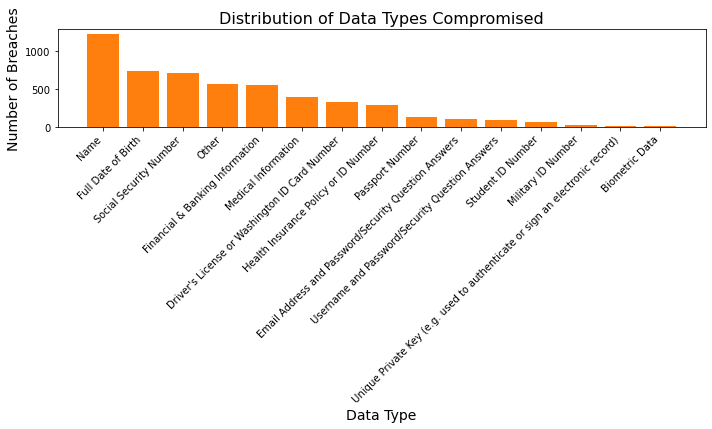

In [98]:
# #question3-Generate a plot describing the distribution of your data, think of what machine learning 
# problem could be around

plt.figure(figsize=(12, 6))
cause_impact = df.groupby('Year')['WashingtoniansAffected'].sum().sort_values(ascending=False)

# Creating a bar plot for 'Year of Breach' vs 'Washingtonians Affected'
plt.bar(cause_impact.index, cause_impact, color='#1f77b4')

plt.title('Number of Washingtonians affected over the years', fontsize=16)
plt.xlabel('Year of Breach', fontsize=14)
plt.ylabel('Number of Washingtonians Affected (in lakhs)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
#plt.grid(axis='y')

# Show the plot
#plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()


plt.figure(figsize=(10, 6))
data_type_counts = df['InformationType'].value_counts()

plt.bar(data_type_counts.index, data_type_counts, color='#ff7f0e')
plt.title('Distribution of Data Types Compromised', fontsize=16)
plt.xlabel('Data Type', fontsize=14)
plt.ylabel('Number of Breaches', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


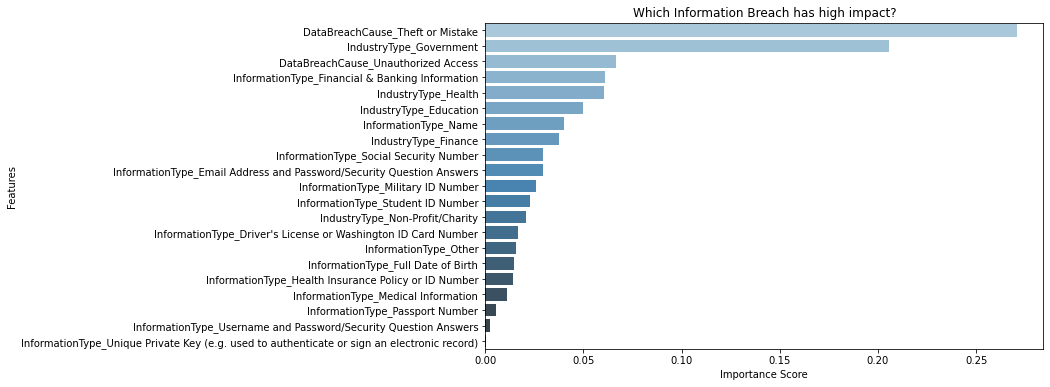

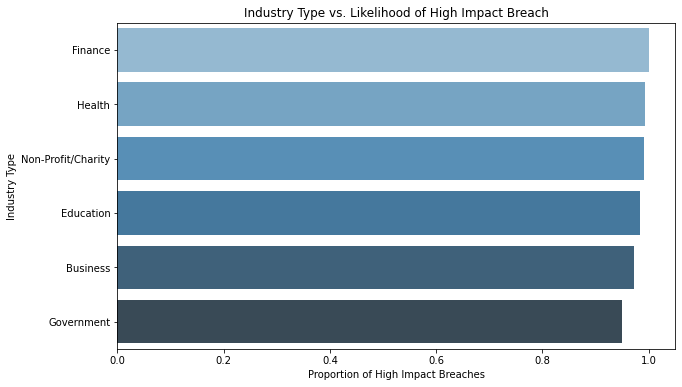

<Figure size 432x288 with 0 Axes>

In [105]:
#Question 4- Generate a series of plots to illustrate to support your story and make your points clear.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Loading the dataset
file_path = r"C:\Users\acer\Downloads\Databreachwashingtondataset.csv"
df = pd.read_csv(file_path)

df['High Impact'] = df['WashingtoniansAffected'].apply(lambda x: 1 if x > 500 else 0)

features = df[['DataBreachCause', 'IndustryType', 'InformationType']]
features = pd.get_dummies(features, drop_first=True)  # Convert categorical to numerical

X = features
y = df['High Impact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Feature Importance Plot
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d')
plt.title('Which Information Breach has high impact?')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


plt.figure(figsize=(10, 6))
industry_impact = df.groupby('IndustryType')['High Impact'].mean().sort_values(ascending=False)

sns.barplot(x=industry_impact, y=industry_impact.index, palette='Blues_d')
plt.xlabel('Proportion of High Impact Breaches')
plt.ylabel('Industry Type')
plt.title('Industry Type vs. Likelihood of High Impact Breach')
plt.show()


plt.tight_layout()
plt.savefig("q234.png", dpi=300)


In [93]:
# Question 5 - Design a dashboard that allows users to explore the data pattern. You may get 
# inspiration from tasks 2-4, but feel free to add insights.  



!pip install dash pandas plotly
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

#Loading the dataset
file_path = r"C:\Users\acer\Downloads\Databreachwashingtondataset.csv"
df = pd.read_csv(file_path)


app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Washington Data Breach Dashboard", style={'textAlign': 'center'}),
    
    # Dropdown for Industry type
    html.Label("Select Industry Type:"),
    dcc.Dropdown(
        id='industry-type-dropdown',
        options=[{'label': cause, 'value': cause} for cause in df['IndustryType'].unique()],
        value=df['IndustryType'].unique()[0],
        clearable=False
    ),
    
    # Bar Chart - Number of Affected Individuals
    dcc.Graph(id='affected-bar-chart'),

])

@app.callback(
    Output('affected-bar-chart', 'figure'),
    Input('industry-type-dropdown', 'value')
)
def update_bar_chart(selected_cause):
    # Ensure correct column names
    filtered_df = df[df['IndustryType'] == selected_cause]
    
    if filtered_df.empty:
        return px.bar(title="No Data Available for Selected Cause")

    # Correct column names
    fig = px.bar(filtered_df, x='Year', y='WashingtoniansAffected', 
                 color='Year', title=f'Impact of {selected_cause} Breaches')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
